In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [2]:
glass = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\10.KNN\\glass.csv")
glass.head()
# glass.shape

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Split dataset into Train and Test 

In [3]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(glass,test_size=0.2)

In [4]:
print(train.shape)
print(test.shape)

(171, 10)
(43, 10)


# import KNN module

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNC

# Identify value of 'K'

In [6]:
acc=[]

for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])
print(acc)
print("legth :",len(acc))

[[0.8070175438596491, 0.6046511627906976], [0.7660818713450293, 0.5581395348837209], [0.7426900584795322, 0.5813953488372093], [0.6900584795321637, 0.4883720930232558], [0.672514619883041, 0.4883720930232558], [0.6491228070175439, 0.46511627906976744], [0.6491228070175439, 0.46511627906976744], [0.6549707602339181, 0.4418604651162791], [0.6432748538011696, 0.46511627906976744], [0.6491228070175439, 0.4418604651162791], [0.6549707602339181, 0.4418604651162791], [0.6432748538011696, 0.46511627906976744], [0.6491228070175439, 0.46511627906976744], [0.6432748538011696, 0.4883720930232558], [0.6432748538011696, 0.4883720930232558], [0.631578947368421, 0.4883720930232558], [0.631578947368421, 0.46511627906976744], [0.6374269005847953, 0.4418604651162791], [0.6257309941520468, 0.4418604651162791], [0.6140350877192983, 0.3953488372093023], [0.6140350877192983, 0.3953488372093023], [0.6140350877192983, 0.3953488372093023], [0.6140350877192983, 0.4186046511627907], [0.6257309941520468, 0.4186046

# visualize obtained 'k' value on chart

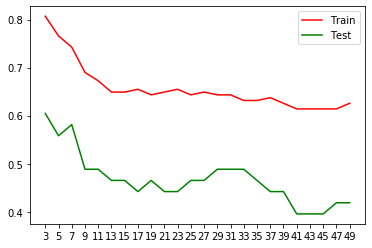

In [7]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"r")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"g")
plt.legend(["Train","Test"])
plt.xticks(np.arange(3,50,2))
plt.show()

In [8]:
# based on the results obtained from above chart, we can conclude our model for k=3

#  model for K = 3

In [9]:
neighbour=KNC(n_neighbors=3)
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8070175438596491 0.6046511627906976


#  confusion matrix & classification report

In [10]:
x_train=train.iloc[:,0:9]
y_train=train.iloc[:,9]

x_test=test.iloc[:,0:9]
y_test=test.iloc[:,9]


In [11]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix


#let us get the predictions using the classifier we had fit above
y_pred = neighbour.predict(x_test)

In [12]:
confusion_matrix(y_test,y_pred)

array([[10,  3,  1,  0,  0,  0],
       [ 5, 11,  0,  1,  2,  0],
       [ 3,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  4]], dtype=int64)

In [13]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.71      0.63        14
           2       0.73      0.58      0.65        19
           3       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.80      0.89         5

    accuracy                           0.60        43
   macro avg       0.46      0.39      0.42        43
weighted avg       0.67      0.60      0.62        43



C:\Users\Swathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
